Previsão de Entrega:

Como o tempo médio de entrega das compras está relacionado com outras variáveis? Podemos prever o tempo de entrega com base nessas variáveis?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.formula.api as sm

Carregamento dos dados e análise

In [2]:
dados = pd.read_csv('dados_vendas.csv')
dados.head()

,ClientAge,WebVisits,BrowsingTime,ItemsPurchased,TotalSpent,StoreRating,DeliveryTime
0,56,52,201,7,755,1,7
1,69,66,162,11,962,2,8
2,46,43,223,8,637,1,9
3,32,30,239,7,476,4,4
4,60,58,191,9,847,3,7


In [3]:
dados.isna().sum()

ClientAge         0
WebVisits         0
BrowsingTime      0
ItemsPurchased    0
TotalSpent        0
StoreRating       0
DeliveryTime      0
dtype: int64

Definindo as variáveis independentes (X) e a dependente (y)

In [4]:
X = dados[['ClientAge', 'WebVisits', 'BrowsingTime', 'ItemsPurchased', 'TotalSpent', 'StoreRating']]
y = dados['DeliveryTime']

Dados de Treinamento e Teste

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Criação do modelo

In [6]:
regressao = LinearRegression()
regressao.fit(X_train, y_train)

LinearRegression()

Previsões com dados de teste

In [7]:
previsoes = regressao.predict(X_test)

Avaliação

In [9]:
erro_medio_quadratico = mean_squared_error(y_test, previsoes)
r_quadrado = r2_score(y_test, previsoes)

# Exibir as métricas de avaliação
print('Erro Médio Quadrático:', erro_medio_quadratico)
print('R²:', r_quadrado)

Erro Médio Quadrático: 1.3711510218270775
R²: 0.4588416216543135


Um erro médio quadrático de 1.37 indica que o modelo está, em média, errando em cerca de 1.37 unidades de tempo de entrega em relação aos valores reais. Além disso, um coeficiente de determinação (R²) de aproximadamente 0.46 sugere que o modelo consegue explicar 46% da variabilidade nos dados de tempo de entrega com base nas outras variáveis.

Visualizar os resultados

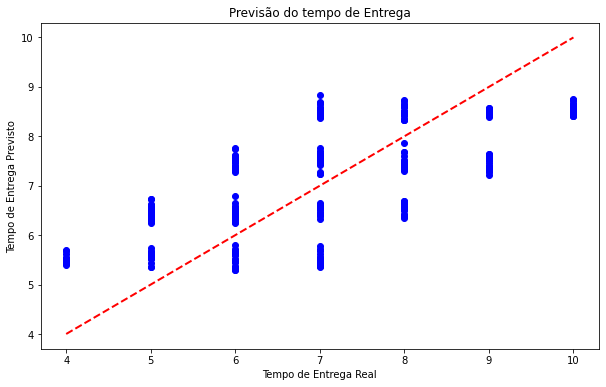

In [10]:
# Valores reais vs previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, previsoes, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
plt.xlabel('Tempo de Entrega Real')
plt.ylabel('Tempo de Entrega Previsto')
plt.title('Previsão do tempo de Entrega')
plt.show()